In [1]:
"""Use GMRES and augmented least squares to perform deconvolution"""

'Use GMRES and augmented least squares to perform deconvolution'

In [2]:
from functools import partial

import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

from deblurring.blurring import blur_and_noise
from deblurring.solvers import GMRESSolver, LSQRSolver

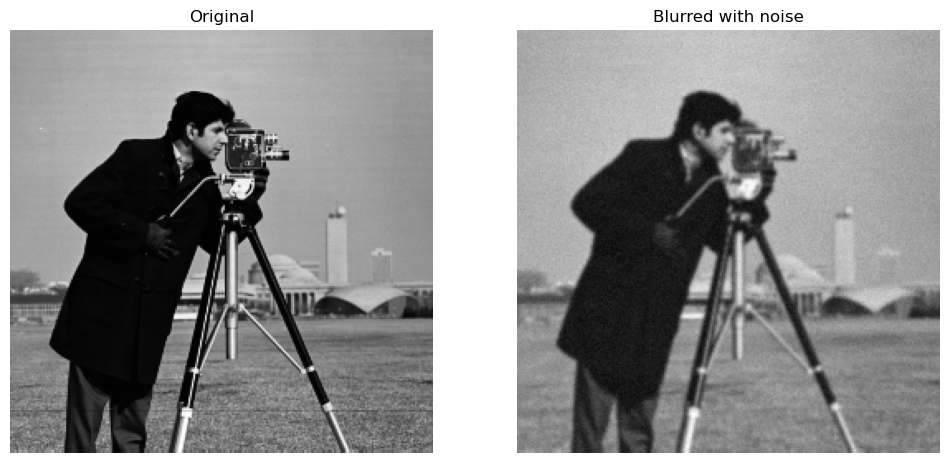

In [3]:
"""Read image and blur with added noise"""

f = plt.imread("../../data/Cameraman256.png")
f = (f - f.min()) / (f.max() - f.min())

theta = 0.02
sigma = 1.0
kernel = partial(gaussian_filter, sigma=sigma)
g = blur_and_noise(f, kernel, theta)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(f, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.title("Blurred with noise")
plt.show()

[INFO] 2024-11-24 08:27:36 | Successfully converged | deblurring.solvers-solve:194


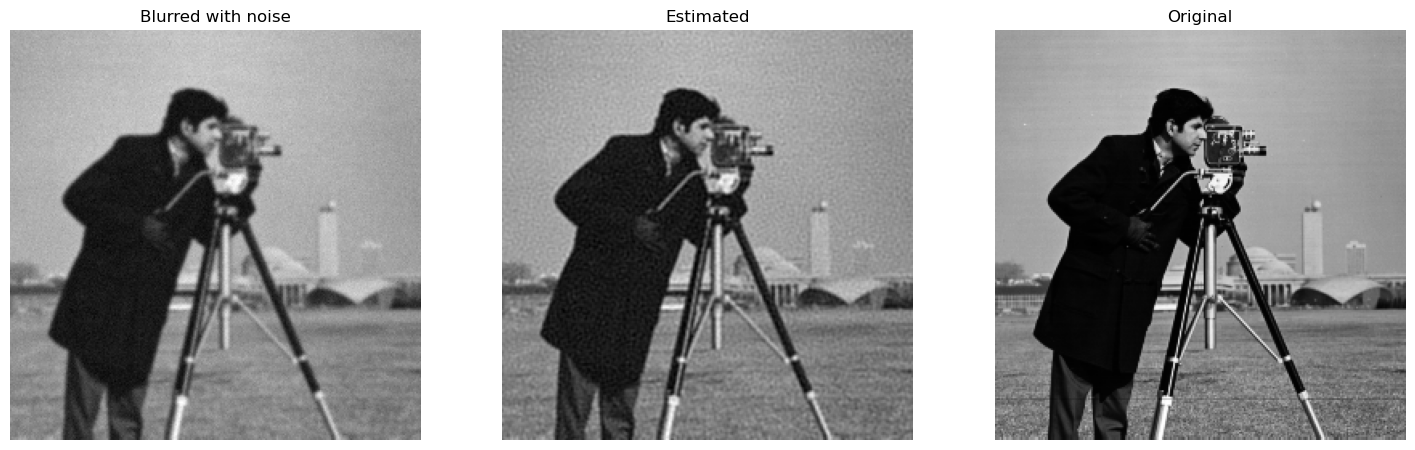

In [4]:
"""Solve with GMRES"""

gmres_solver = GMRESSolver(g, kernel)
f_hat = gmres_solver.solve(alpha=5e-2)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.title("Blurred with noise")
plt.subplot(1, 3, 2)
plt.imshow(f_hat, cmap="gray")
plt.axis("off")
plt.title("Estimated")
plt.subplot(1, 3, 3)
plt.imshow(f, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.show()

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 131072 rows and 65536 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-06                 conlim = 1.00e+08
btol = 1.00e-06               iter_lim =      100
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   1.322e+02  1.322e+02    1.0e+00  7.5e-03
     1  5.85611e-01   3.006e+01  3.006e+01    2.3e-01  1.4e-01   1.0e+00  1.0e+00
     2  5.86187e-01   2.953e+01  2.953e+01    2.2e-01  4.2e-02   1.3e+00  2.1e+00
     3  5.91832e-01   2.944e+01  2.944e+01    2.2e-01  1.9e-02   1.5e+00  3.3e+00
     4  5.92859e-01   2.941e+01  2.941e+01    2.2e-01  9.8e-03   1.7e+00  4.7e+00
     5  5.92927e-01   2.940e+01  2.940e+01    2.2e-01  5.8e-03   1.8e+00  6.2e+00
     6  5.91922e-01   2.939e+01  2.939e+01    2.2e-01  3.5e-03   2.0e+00  7.8e+00
     7  5.90913e-01   2.939e+01  2.939e+01    2.2e-01  2.2e-03   2.1e+00  9.5e+00
     8  5.89546e-01   2.939e+01

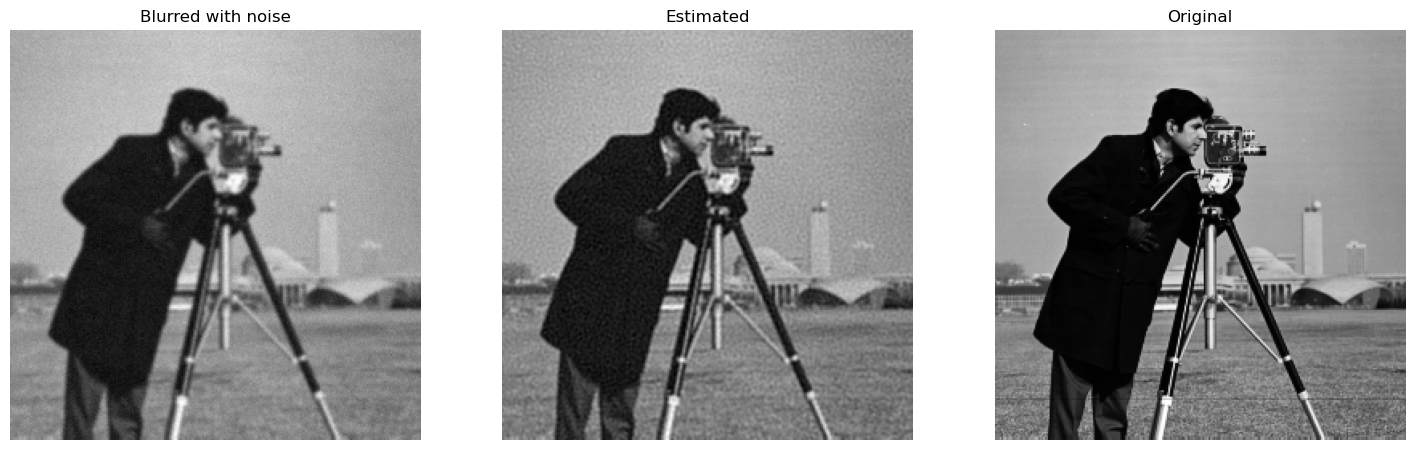

In [5]:
"""Solve with LSQR"""

lsqr_solver = LSQRSolver(g, kernel)
f_hat = lsqr_solver.solve(alpha=5e-2)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.title("Blurred with noise")
plt.subplot(1, 3, 2)
plt.imshow(f_hat, cmap="gray")
plt.axis("off")
plt.title("Estimated")
plt.subplot(1, 3, 3)
plt.imshow(f, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.show()